## <center> Import Libs

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 14

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
import string
import nltk
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrejbaranov/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## <center> Import Data

In [67]:
data = pd.read_csv('data/phizer.csv')
data.head()


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


## <center> Data Info

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [69]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,8.082000e+03,8.082000e+03,8082.000000,8.082000e+03,8082.000000,8082.000000
mean,1.354990e+18,3.550042e+04,1192.207127,1.513661e+04,1.472037,8.690671
std,1.265681e+16,2.914947e+05,2982.597309,4.882913e+04,12.922145,59.121769
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.344901e+18,1.100000e+02,165.000000,4.172500e+02,0.000000,0.000000
50%,1.351682e+18,4.805000e+02,465.000000,2.329000e+03,0.000000,1.000000
75%,1.364592e+18,2.089750e+03,1249.500000,1.124975e+04,1.000000,4.000000
max,1.384788e+18,1.371493e+07,103226.000000,1.166459e+06,678.000000,2315.000000


## <center> Null data / Duplicates

In [70]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [71]:
data.dropna(
    axis=1,
    inplace = True
)

data.isnull().sum()

id                 0
user_name          0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
retweets           0
favorites          0
is_retweet         0
dtype: int64

In [72]:
print(f"Duplicated data: {data.duplicated().sum()}")

Duplicated data: 0


## <center> Data Cleaning

In [73]:
data = data[['id','text']]

data.head()

,id,text
0,1340539111971516416,Same folks said daikon paste could treat a cyt...
1,1338158543359250433,While the world has been on the wrong side of ...
2,1337858199140118533,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1337855739918835717,"Facts are immutable, Senator, even when you're..."
4,1337854064604966912,Explain to me again why we need a vaccine @Bor...


In [74]:
stemmer = nltk.SnowballStemmer("english")

stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
    
data["text"] = data["text"].apply(clean)

## <center> Most Frequent Words

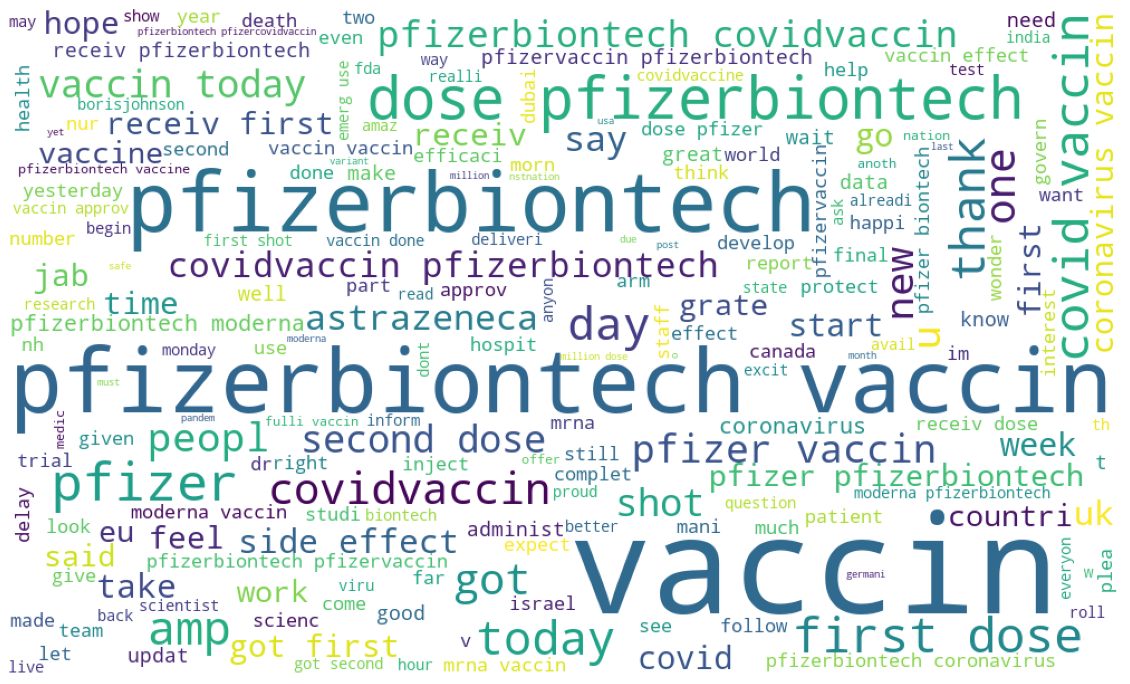

In [75]:
text = " ".join(i for i in data.text)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    stopwords=stopwords, 
    background_color="white",
    width=1000,
    height=600,
    prefer_horizontal=0.9
).generate(text)

plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## <center> Sentiment Analysis using NLTK

In [76]:
sentiments = SentimentIntensityAnalyzer()
    
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["text"]]

data = data[["text", "Positive", "Negative", "Neutral", "Compound"]]

data.head()

,text,Positive,Negative,Neutral,Compound
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748,0.4019
1,world wrong side histori year hope biggest vac...,0.193,0.207,0.600,-0.0516
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000,0.0000
3,fact immut senat even your ethic sturdi enough...,0.000,0.000,1.000,0.0000
4,explain need vaccin borisjohnson matthancock w...,0.000,0.000,1.000,0.0000


## <center> Creating Labels

In [77]:
score = data["Compound"].values

sentiment = []

for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

data["Sentiment"] = sentiment

data.head()

,text,Positive,Negative,Neutral,Compound,Sentiment
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748,0.4019,Positive
1,world wrong side histori year hope biggest vac...,0.193,0.207,0.600,-0.0516,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000,0.0000,Neutral
3,fact immut senat even your ethic sturdi enough...,0.000,0.000,1.000,0.0000,Neutral
4,explain need vaccin borisjohnson matthancock w...,0.000,0.000,1.000,0.0000,Neutral


## <center> Sentiments Ratio

In [80]:
sentiment_values = data['Sentiment'].value_counts().index
sentiment_counts = data['Sentiment'].value_counts().values

px.pie(
    names=sentiment_values,
    values=sentiment_counts,
    hole=0.4,
    title="Sentiments Ratio"
)

## <center> Save Data

In [82]:
data.to_csv('data/Phizer_labeled.csv', index = False)